6/6 [==============================] - 0s 468us/step - loss: 3.7981
Test loss: 3.7980778217315674
28/28 [==============================] - 0s 389us/step


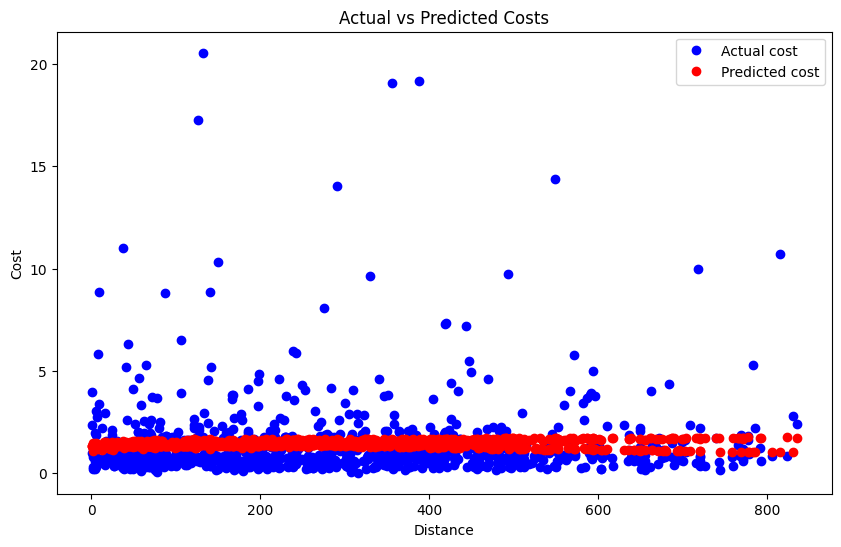

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create a DataFrame
df = pd.read_csv('./PEM.csv')

# Define features and target
X = df[['from', 'to', 'distance']]
y = df['cost']

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(128, input_dim=3, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # No activation function for the output layer in regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# Predict cost for all distances in the dataset
predicted_costs = model.predict(X_scaled)

# Add the predicted costs to the DataFrame
df['predicted_cost'] = predicted_costs

# Plot the actual vs predicted costs
plt.figure(figsize=(10, 6))
plt.plot(df['distance'], df['cost'], 'bo', label='Actual cost')
plt.plot(df['distance'], df['predicted_cost'], 'ro', label='Predicted cost')
plt.xlabel('Distance')
plt.ylabel('Cost')
plt.title('Actual vs Predicted Costs')
plt.legend()
plt.show()
